In [258]:
import torch
import torchvision
import torchvision.transforms as transforms

In [259]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 100

trainSet = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=batch_size, shuffle=True)

testSet = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

testLoader = torch.utils.data.DataLoader(testSet, batch_size=batch_size, shuffle=False)




Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Processing...
Done!


Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


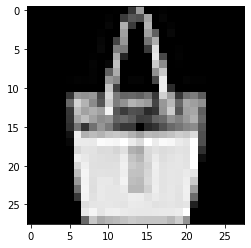

Label: 8


In [260]:
train_features, train_labels = next(iter(trainLoader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [261]:
# Function to convert label to string for the Fashion-MNIST dataset

def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [262]:
import torch.nn as nn
import torch.nn.functional as F

In [263]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc1 = nn.Linear(64 * 5 * 5, 540)
        self.drop = nn.Dropout2d(0.1)
        self.fc2 = nn.Linear(540, 120)
        self.fc3 = nn.Linear(120,10)
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1600, out_features=540, bias=True)
  (drop): Dropout2d(p=0.1, inplace=False)
  (fc2): Linear(in_features=540, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [264]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [265]:
num_epochs = 5
# Lists for loss and accuracy
loss_list = []
iteration_list = []
accuracy_list= []

# List for predictions
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    
    running_loss = 0.0
    
    for i, data in enumerate(trainLoader, 0):
        # get the inputs and labels
        inputs, labels = data
        # Set optimizer gradient to zero between batches
        optimizer.zero_grad()
        
        
        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        
        # Backpropagation
        loss.backward()
        
        # Optimize parameters
        optimizer.step()
        
        # Update running loss
        running_loss += loss.item()
        
        
        # Display model accuracy and loss
        if i % 500 == 0:
            # Get accuracy data
            correct = 0
            total = 0
            #for data in testLoader:
             #   images, labels = data
              #  outputs = net(images)
               # _, predicted = torch.max(outputs.data, 1)
                #total += labels.size(0)
                #correct += (predicted == labels).sum().item()
            #accuracy = correct * 100 / total
            #print('Epoch: {}, Iteration: {}, Loss: {}, Test Accuracy: {}%'.format(epoch+1, i, loss.data, accuracy))
            running_loss = 0.0
print('Finished Training')

Finished Training


Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


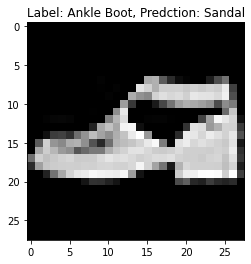

In [266]:
#Show pictures of test set with classification
i = 23

test_features, test_labels = next(iter(testLoader))
print(f'Feature batch shape: {test_features.size()}')
print(f'Labels batch shape: {test_labels.size()}')
img = test_features[i].squeeze()
label = test_labels[i]
output = net(test_features)
_, prediction = torch.max(output.data, 1)
plt.title("Label: {}, Predction: {}".format(output_label(label), output_label(prediction[i])))
plt.imshow(img, cmap="gray")
plt.show()